In [75]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [92]:
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns


#Processamento de Linguagem Natural
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [77]:
dataframe_sentimento = pd.read_csv('dataframe_final_candidatos_pronto_para_sentimento.csv')

In [78]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo
0,2022-08-01 19:41:42+00:00,1554190656221970439,@PedroRonchi2 Peraí. ....e a dinheirama desvia...,Lula,peraí. ....e a dinheirama desviada da petrobr...
1,2022-08-01 19:41:40+00:00,1554190648038891520,@LulaOficial @gioewbank @brunogagliasso Jument...,Lula,jumento você esqueceu de dizer que os insul...
2,2022-08-01 19:41:39+00:00,1554190644767342595,@ECantanhede Enquanto tiver eleitor do Lula e ...,Lula,enquanto tiver eleitor do lula e bobos q comp...
3,2022-08-01 19:41:36+00:00,1554190630938677251,@xpinvestimentos O futuro é pra quem não cair ...,Lula,o futuro é pra quem não cair nas falácias da ...
4,2022-08-01 19:41:36+00:00,1554190630837952520,@LulaOficial Excelência:proponha um bolsa famí...,Lula,excelência:proponha um bolsa família de r$100...


In [79]:
analisador_de_texto = SentimentIntensityAnalyzer()

In [80]:
dataframe_sentimento['Sentimentos'] = dataframe_sentimento["Tweet_limpo"].apply(lambda i:analisador_de_texto.polarity_scores(' '.join(re.findall(r'\w+', i.lower()))))

In [81]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos
0,2022-08-01 19:41:42+00:00,1554190656221970439,@PedroRonchi2 Peraí. ....e a dinheirama desvia...,Lula,peraí. ....e a dinheirama desviada da petrobr...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp..."
1,2022-08-01 19:41:40+00:00,1554190648038891520,@LulaOficial @gioewbank @brunogagliasso Jument...,Lula,jumento você esqueceu de dizer que os insul...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,2022-08-01 19:41:39+00:00,1554190644767342595,@ECantanhede Enquanto tiver eleitor do Lula e ...,Lula,enquanto tiver eleitor do lula e bobos q comp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,2022-08-01 19:41:36+00:00,1554190630938677251,@xpinvestimentos O futuro é pra quem não cair ...,Lula,o futuro é pra quem não cair nas falácias da ...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp..."
4,2022-08-01 19:41:36+00:00,1554190630837952520,@LulaOficial Excelência:proponha um bolsa famí...,Lula,excelência:proponha um bolsa família de r$100...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [82]:
dataframe_sentimento['Sentimentos']

0      {'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...
1      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3      {'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...
4      {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                             ...                        
148    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
149    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
150    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
151    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
152    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentimentos, Length: 153, dtype: object

In [83]:
dataframe_sentimento['Positivo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['pos'])
dataframe_sentimento['Negativo'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neg'])
dataframe_sentimento['Neutro'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['neu'])
dataframe_sentimento['Composicao'] = dataframe_sentimento['Sentimentos'].apply(lambda i:i['compound'])

In [84]:
dataframe_sentimento.tail()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao
148,2022-08-01 19:41:06+00:00,1554190506883784704,@JSPendot @camposamd Mais uma pau mandado de B...,Bolsonaro,mais uma pau mandado de bolsonaro:,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
149,2022-08-01 19:41:06+00:00,1554190503427641344,@Joaogabrielsr22 @BrunoTargino3 @Poder360 @jai...,Bolsonaro,como nao houve? qual era a proposta do bol...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
150,2022-08-01 19:41:04+00:00,1554190496750239746,"@pablo_giuliani @slpng_giants_pt O ameba, imbe...",Bolsonaro,"o ameba, imbecil, tu entende tanto de leis e...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
151,2022-08-01 19:41:03+00:00,1554190491121598465,@sergioj1612 @Sandroprofmat @Valdecirdelecl1 @...,Bolsonaro,mudando a argumentacao pois a pesquisa ja ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0
152,2022-08-01 19:41:03+00:00,1554190490945323009,@Robert_jus @CousandierMara @Lojas_Renner @jai...,Bolsonaro,2.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,0.0,1.0,0.0


In [85]:
sentimento =[]

In [86]:
for i in dataframe_sentimento['Composicao']:
  if i >= 0.05:
    sentimento.append('Positivo')
  elif i <= (-0.05):
    sentimento.append('Negativo')
  else:
    sentimento.append('Neutro')


In [87]:
dataframe_sentimento['Sentimento_Final'] = sentimento

In [88]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-08-01 19:41:42+00:00,1554190656221970439,@PedroRonchi2 Peraí. ....e a dinheirama desvia...,Lula,peraí. ....e a dinheirama desviada da petrobr...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",0.000,0.087,0.913,-0.5267,Negativo
1,2022-08-01 19:41:40+00:00,1554190648038891520,@LulaOficial @gioewbank @brunogagliasso Jument...,Lula,jumento você esqueceu de dizer que os insul...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
2,2022-08-01 19:41:39+00:00,1554190644767342595,@ECantanhede Enquanto tiver eleitor do Lula e ...,Lula,enquanto tiver eleitor do lula e bobos q comp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
3,2022-08-01 19:41:36+00:00,1554190630938677251,@xpinvestimentos O futuro é pra quem não cair ...,Lula,o futuro é pra quem não cair nas falácias da ...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.157,0.000,0.843,0.3818,Positivo
4,2022-08-01 19:41:36+00:00,1554190630837952520,@LulaOficial Excelência:proponha um bolsa famí...,Lula,excelência:proponha um bolsa família de r$100...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro


In [89]:
dataframe_sentimento['Sentimento_Final'].value_counts()

Neutro      131
Negativo     12
Positivo     10
Name: Sentimento_Final, dtype: int64

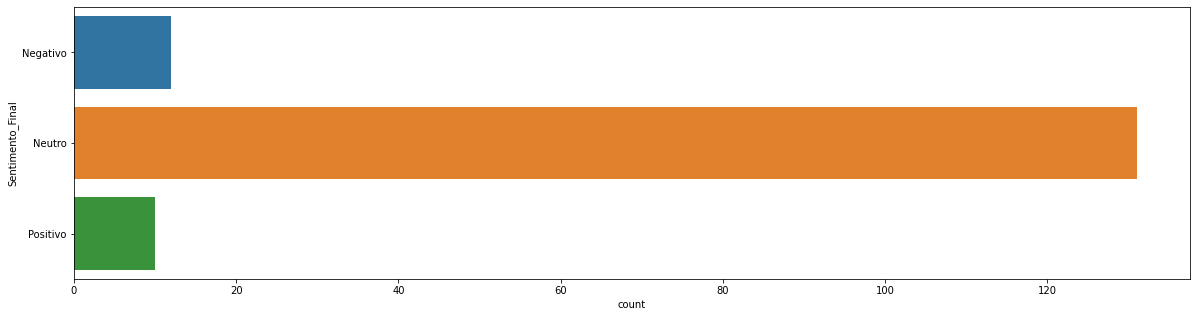

In [93]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data=dataframe_sentimento)

###Lula

In [94]:
resultado_filtro_lula = dataframe_sentimento[dataframe_sentimento['Candidato'] == "Lula" ]

In [95]:
resultado_filtro_lula.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-08-01 19:41:42+00:00,1554190656221970439,@PedroRonchi2 Peraí. ....e a dinheirama desvia...,Lula,peraí. ....e a dinheirama desviada da petrobr...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",0.000,0.087,0.913,-0.5267,Negativo
1,2022-08-01 19:41:40+00:00,1554190648038891520,@LulaOficial @gioewbank @brunogagliasso Jument...,Lula,jumento você esqueceu de dizer que os insul...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
2,2022-08-01 19:41:39+00:00,1554190644767342595,@ECantanhede Enquanto tiver eleitor do Lula e ...,Lula,enquanto tiver eleitor do lula e bobos q comp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
3,2022-08-01 19:41:36+00:00,1554190630938677251,@xpinvestimentos O futuro é pra quem não cair ...,Lula,o futuro é pra quem não cair nas falácias da ...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.157,0.000,0.843,0.3818,Positivo
4,2022-08-01 19:41:36+00:00,1554190630837952520,@LulaOficial Excelência:proponha um bolsa famí...,Lula,excelência:proponha um bolsa família de r$100...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro


In [96]:
resultado_filtro_lula['Candidato'].unique()

array(['Lula'], dtype=object)

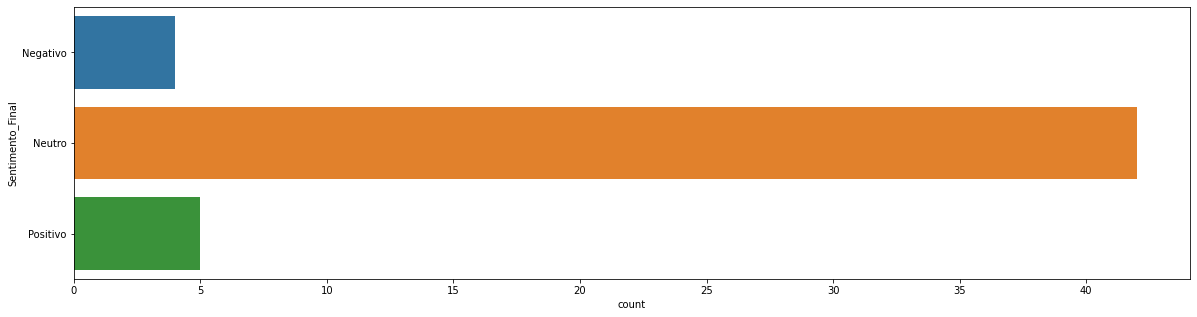

In [97]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data=resultado_filtro_lula)

###Bolsonaro

In [98]:
resultado_filtro_bolsonaro = dataframe_sentimento[dataframe_sentimento['Candidato'] == "Bolsonaro" ]

In [100]:
resultado_filtro_bolsonaro['Candidato'].unique()

array(['Bolsonaro'], dtype=object)

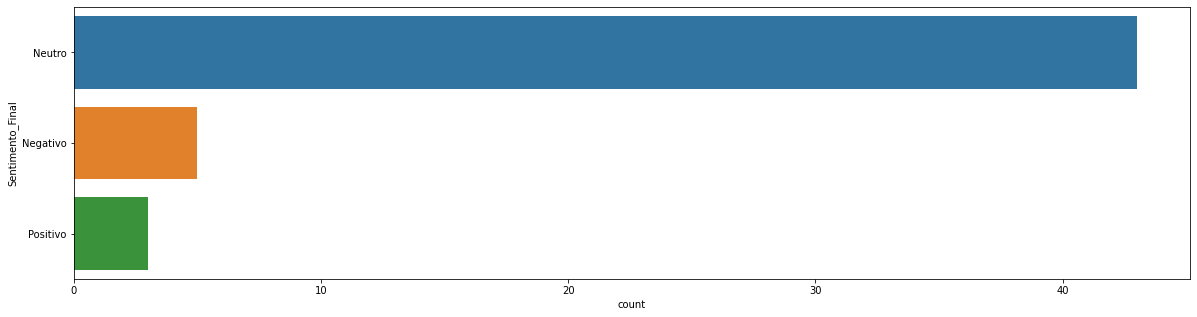

In [101]:
plt.figure(figsize=(20,5))
sns.countplot(y="Sentimento_Final", data=resultado_filtro_bolsonaro)

In [102]:
dataframe_sentimento.head()

,Data_Hora,IdTweet,Tweet,Candidato,Tweet_limpo,Sentimentos,Positivo,Negativo,Neutro,Composicao,Sentimento_Final
0,2022-08-01 19:41:42+00:00,1554190656221970439,@PedroRonchi2 Peraí. ....e a dinheirama desvia...,Lula,peraí. ....e a dinheirama desviada da petrobr...,"{'neg': 0.087, 'neu': 0.913, 'pos': 0.0, 'comp...",0.000,0.087,0.913,-0.5267,Negativo
1,2022-08-01 19:41:40+00:00,1554190648038891520,@LulaOficial @gioewbank @brunogagliasso Jument...,Lula,jumento você esqueceu de dizer que os insul...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
2,2022-08-01 19:41:39+00:00,1554190644767342595,@ECantanhede Enquanto tiver eleitor do Lula e ...,Lula,enquanto tiver eleitor do lula e bobos q comp...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro
3,2022-08-01 19:41:36+00:00,1554190630938677251,@xpinvestimentos O futuro é pra quem não cair ...,Lula,o futuro é pra quem não cair nas falácias da ...,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.157,0.000,0.843,0.3818,Positivo
4,2022-08-01 19:41:36+00:00,1554190630837952520,@LulaOficial Excelência:proponha um bolsa famí...,Lula,excelência:proponha um bolsa família de r$100...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,0.000,1.000,0.0000,Neutro


In [107]:
dataframe_final = dataframe_sentimento[["Data_Hora","IdTweet", "Tweet","Tweet_limpo", "Candidato", "Sentimento_Final" ]]

In [109]:
dataframe_final.head()

,Data_Hora,IdTweet,Tweet,Tweet_limpo,Candidato,Sentimento_Final
0,2022-08-01 19:41:42+00:00,1554190656221970439,@PedroRonchi2 Peraí. ....e a dinheirama desvia...,peraí. ....e a dinheirama desviada da petrobr...,Lula,Negativo
1,2022-08-01 19:41:40+00:00,1554190648038891520,@LulaOficial @gioewbank @brunogagliasso Jument...,jumento você esqueceu de dizer que os insul...,Lula,Neutro
2,2022-08-01 19:41:39+00:00,1554190644767342595,@ECantanhede Enquanto tiver eleitor do Lula e ...,enquanto tiver eleitor do lula e bobos q comp...,Lula,Neutro
3,2022-08-01 19:41:36+00:00,1554190630938677251,@xpinvestimentos O futuro é pra quem não cair ...,o futuro é pra quem não cair nas falácias da ...,Lula,Positivo
4,2022-08-01 19:41:36+00:00,1554190630837952520,@LulaOficial Excelência:proponha um bolsa famí...,excelência:proponha um bolsa família de r$100...,Lula,Neutro


In [110]:
dataframe_final.to_csv('dataframe_final.csv', sep=',', index=False)